In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv(r'C:\Infosys_Spring_Project\filtered_dataa.csv')
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,5.7,-6.0,42.0,2.104744,135,1009.13,39.3,0.00,1,0.0,...,2.560143,23.839076,3.700695,0.7,1.723598,0.0,United Kingdom,55.440834,-5.696944,12.8
1,15.2,10.1,71.0,2.300776,170,1018.60,30.1,0.00,5,0.0,...,4.587078,18.641518,5.949882,2.8,3.112878,1.0,Canada,48.460000,-123.300000,60.1
2,5.9,4.2,88.0,6.044373,321,1009.76,11.2,7.10,0,0.0,...,3.518428,26.522018,4.987631,0.2,1.337885,0.0,Canada,53.460000,-111.260000,656.0
3,20.6,15.4,71.0,5.068362,197,1015.41,21.1,0.00,1,0.0,...,2.489215,21.491070,3.584512,1.6,2.127962,0.0,Canada,53.350000,-110.420000,664.0
4,11.0,6.0,71.5,4.014202,260,1005.90,16.1,0.25,0,0.0,...,2.134811,5.773131,2.332688,1.4,1.804797,0.0,United States,43.645645,-70.308620,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085215,11.5,4.5,62.0,3.941651,292,1015.70,17.9,0.20,0,0.0,...,1.296040,16.996609,2.066182,1.8,1.874659,0.0,Canada,51.870000,-63.280000,588.9
1085216,17.9,5.9,45.5,2.815510,220,1012.10,24.0,0.00,2,0.0,...,2.433377,10.184448,3.186213,3.1,2.574855,0.2,Canada,49.910000,-99.951940,409.4
1085217,18.4,9.0,54.5,4.323462,300,1017.10,19.8,0.00,1,0.0,...,3.970986,16.524337,5.178832,5.1,3.282526,1.6,Canada,51.770000,-104.200000,560.1
1085218,11.0,-1.0,43.6,6.224325,260,1015.10,14.5,0.00,4,0.0,...,2.881065,21.910633,4.107568,11.8,3.501465,3.0,Canada,49.520557,-113.997220,1189.6


In [11]:
data = data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,5.7,-6.0,42.0,2.104744,1009.13,0.00,1,57307.647366,2.560143,23.839076,3.700695,0.7,1.723598,United Kingdom
1,15.2,10.1,71.0,2.300776,1018.60,0.00,5,120479.346226,4.587078,18.641518,5.949882,2.8,3.112878,Canada
2,5.9,4.2,88.0,6.044373,1009.76,7.10,0,14793.936650,3.518428,26.522018,4.987631,0.2,1.337885,Canada
3,20.6,15.4,71.0,5.068362,1015.41,0.00,1,63795.834743,2.489215,21.491070,3.584512,1.6,2.127962,Canada
4,11.0,6.0,71.5,4.014202,1005.90,0.25,0,80648.098760,2.134811,5.773131,2.332688,1.4,1.804797,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085215,11.5,4.5,62.0,3.941651,1015.70,0.20,0,93811.106800,1.296040,16.996609,2.066182,1.8,1.874659,Canada
1085216,17.9,5.9,45.5,2.815510,1012.10,0.00,2,120073.207278,2.433377,10.184448,3.186213,3.1,2.574855,Canada
1085217,18.4,9.0,54.5,4.323462,1017.10,0.00,1,124590.075240,3.970986,16.524337,5.178832,5.1,3.282526,Canada
1085218,11.0,-1.0,43.6,6.224325,1015.10,0.00,4,127099.821594,2.881065,21.910633,4.107568,11.8,3.501465,Canada


In [13]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'country'],
      dtype='object')

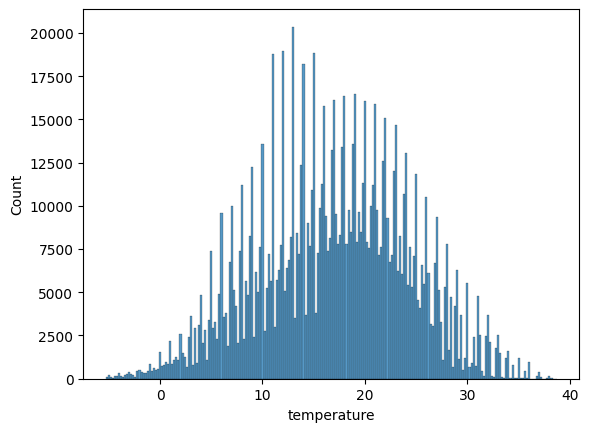

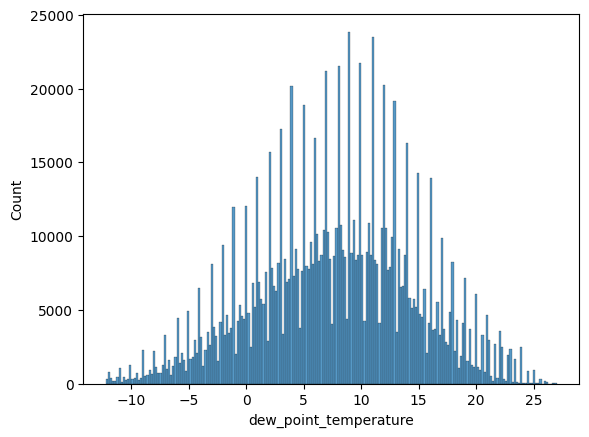

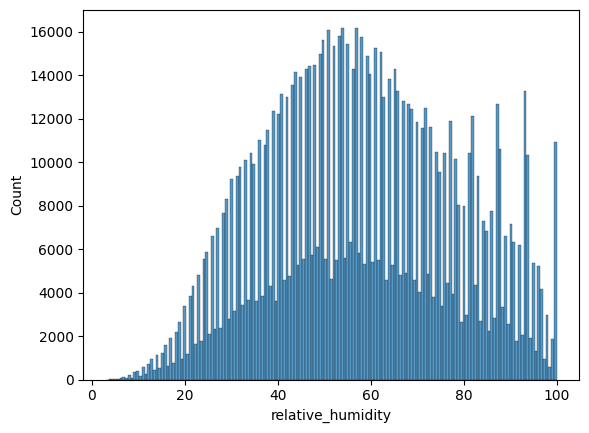

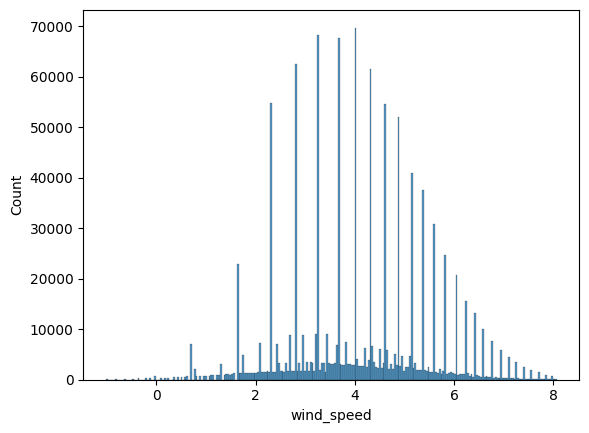

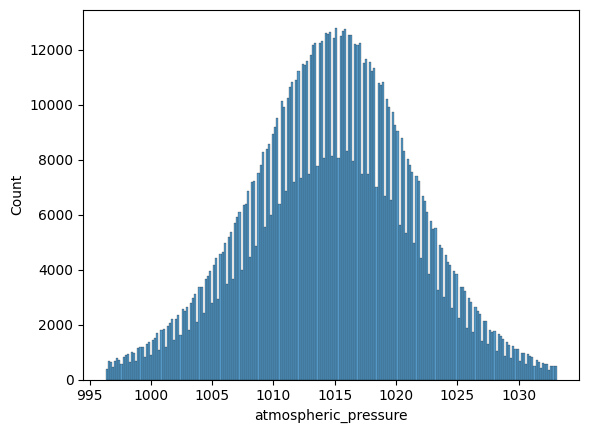

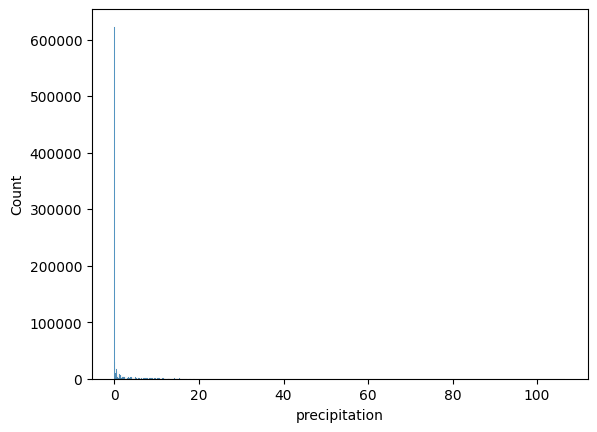

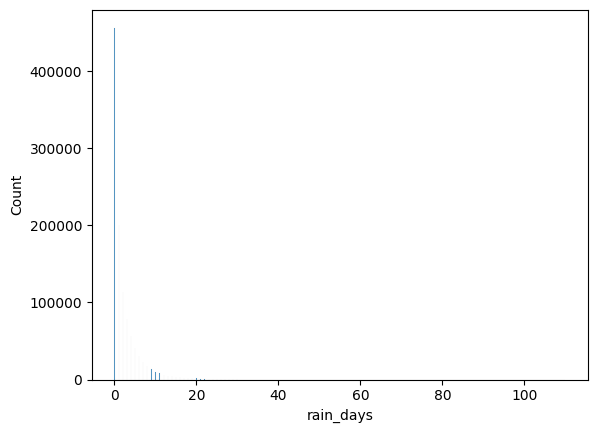

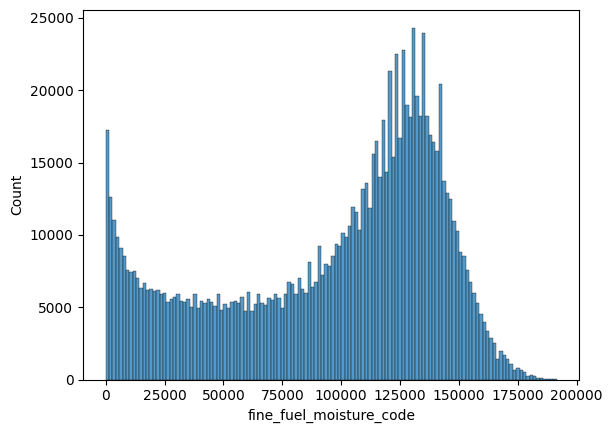

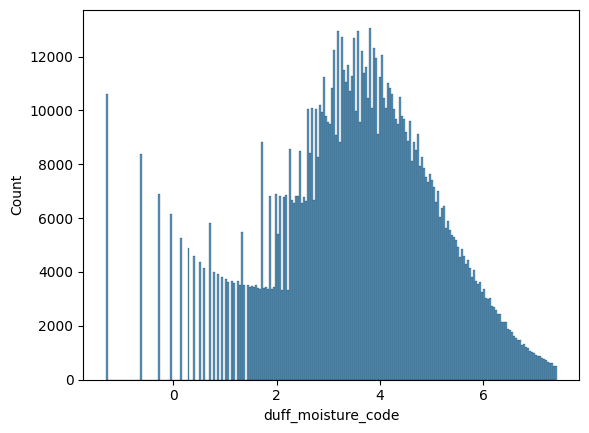

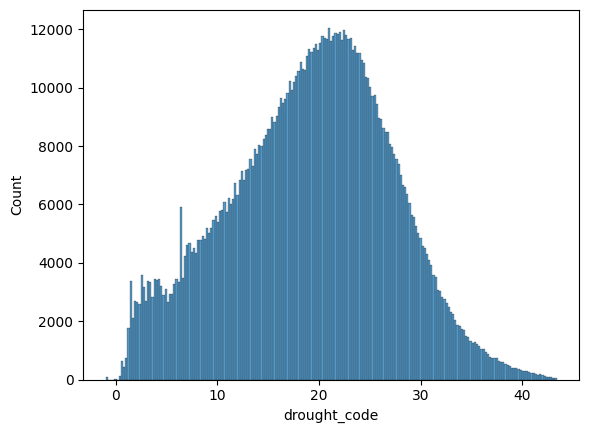

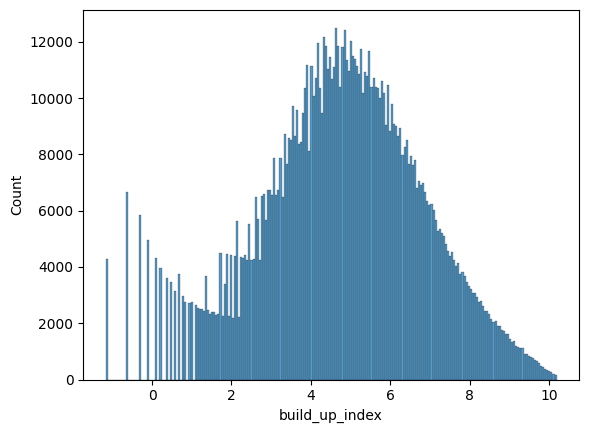

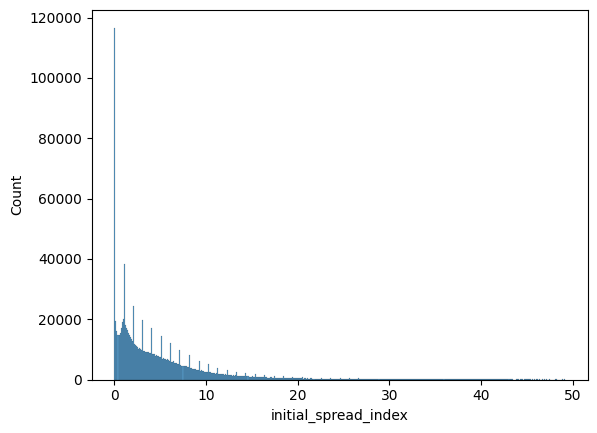

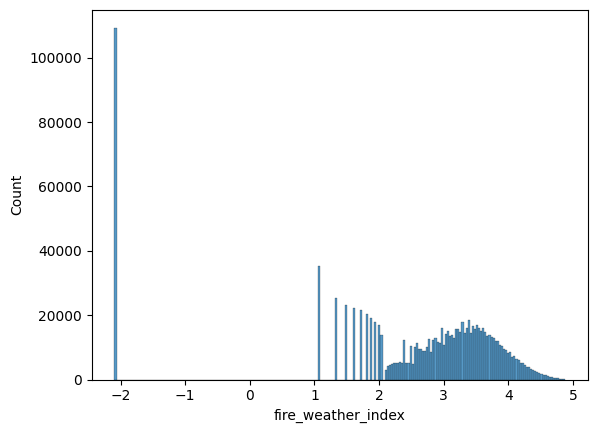

In [14]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [15]:
non_nd_col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']

In [16]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
lambda_values = {}

for col in non_nd_col:
    transformed = pt.fit_transform(data[col].values.reshape(-1, 1))
    data[col + '_transformed'] = transformed.flatten()
    lambda_values[col] = pt.lambdas_[0]

for col, lam in lambda_values.items():
    print(f"Column: {col}, Lambda: {lam}")

Column: fine_fuel_moisture_code, Lambda: 1.0055313944378836
Column: duff_moisture_code, Lambda: 1.2697846150339003
Column: drought_code, Lambda: 1.0031142908404136
Column: build_up_index, Lambda: 1.1384045171199793
Column: initial_spread_index, Lambda: -0.07846550039782302
Column: fire_weather_index, Lambda: 1.8812437942881013
Column: wind_speed, Lambda: 1.015042332634185


In [17]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,5.7,-6.0,42.0,2.104744,1009.13,0.00,1,57307.647366,2.560143,23.839076,...,0.7,1.723598,United Kingdom,60553.183908,3.161716,24.014036,4.237168,0.519733,2.969218,2.126126
1,15.2,10.1,71.0,2.300776,1018.60,0.00,5,120479.346226,4.587078,18.641518,...,2.8,3.112878,Canada,127826.749424,6.211427,18.766063,7.105464,1.267458,7.070175,2.325620
2,5.9,4.2,88.0,6.044373,1009.76,7.10,0,14793.936650,3.518428,26.522018,...,0.2,1.337885,Canada,15515.157158,4.557650,26.724395,5.859624,0.181024,2.095081,6.161621
3,20.6,15.4,71.0,5.068362,1015.41,0.00,1,63795.834743,2.489215,21.491070,...,1.6,2.127962,Canada,67448.816413,3.062080,21.642783,4.093478,0.920571,4.010596,5.157622
4,11.0,6.0,71.5,4.014202,1005.90,0.25,0,80648.098760,2.134811,5.773131,...,1.4,1.804797,United States,85376.660322,2.572559,5.795553,2.579818,0.846076,3.168137,4.075982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085215,11.5,4.5,62.0,3.941651,1015.70,0.20,0,93811.106800,1.296040,16.996609,...,1.8,1.874659,Canada,99394.518584,1.475212,17.106052,2.266781,0.989126,3.343401,4.001659
1085216,17.9,5.9,45.5,2.815510,1012.10,0.00,2,120073.207278,2.433377,10.184448,...,3.1,2.574855,Canada,127393.462944,2.984023,10.236986,3.604772,1.335684,5.307847,2.850270
1085217,18.4,9.0,54.5,4.323462,1017.10,0.00,1,124590.075240,3.970986,16.524337,...,5.1,3.282526,Canada,132212.701925,5.246418,16.629529,6.105105,1.685860,7.670754,4.392979
1085218,11.0,-1.0,43.6,6.224325,1015.10,0.00,4,127099.821594,2.881065,21.910633,...,11.8,3.501465,Canada,134890.877314,3.619138,22.066445,4.744183,2.310631,8.477361,6.346971


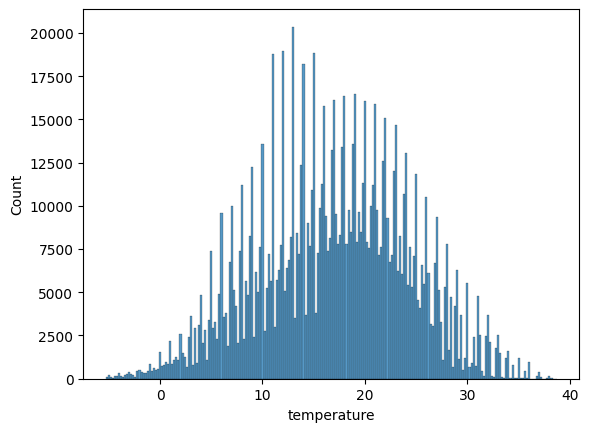

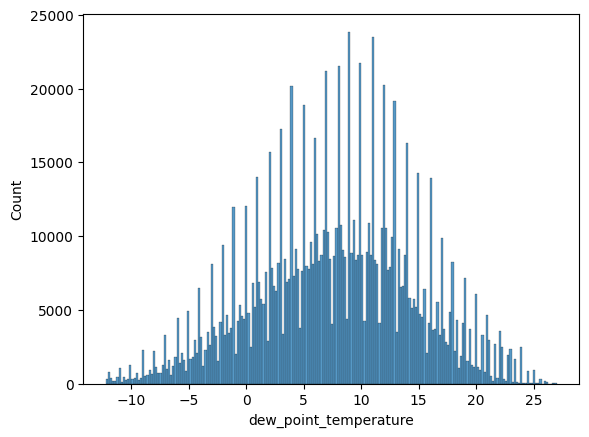

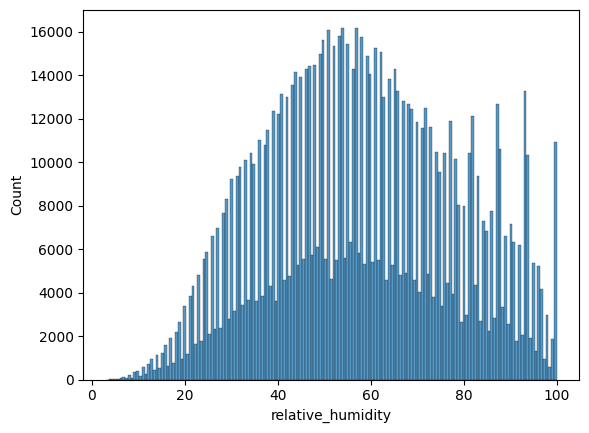

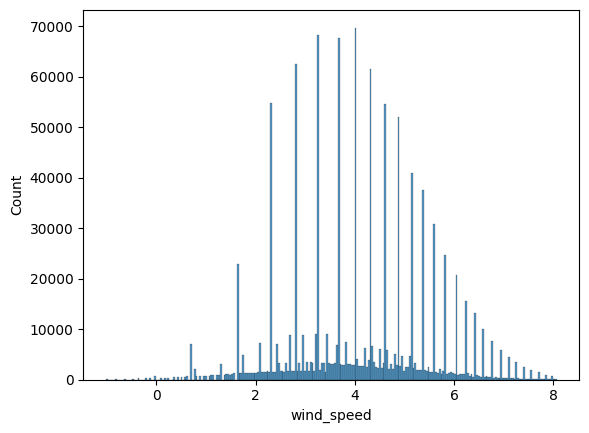

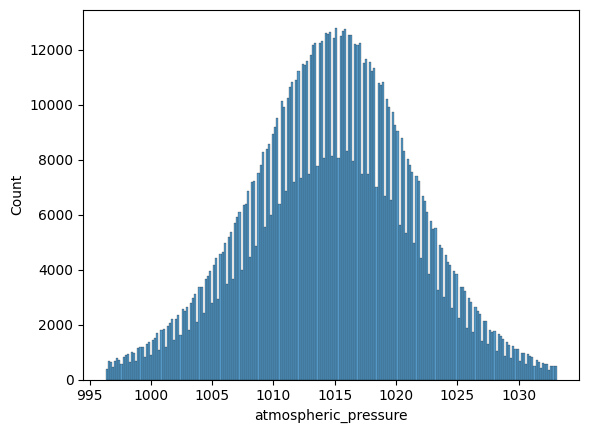

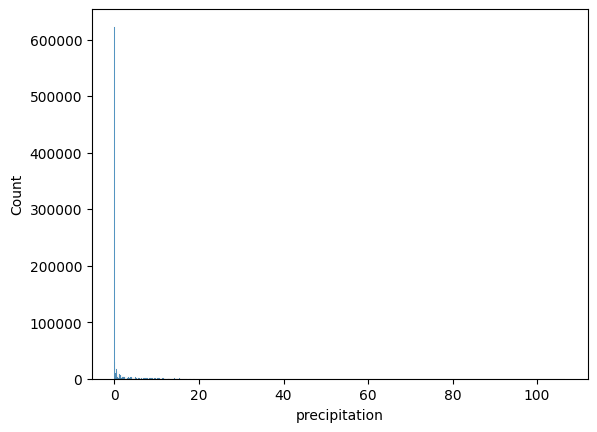

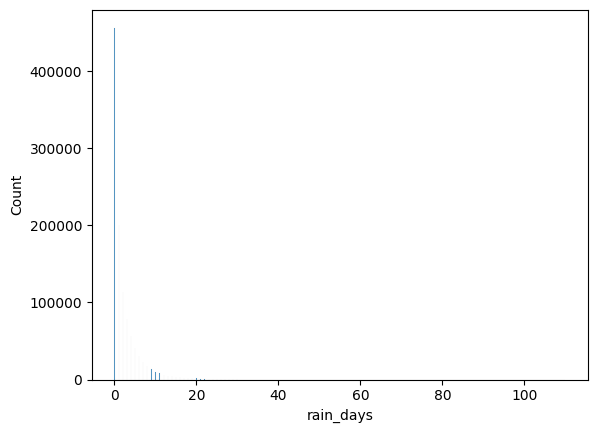

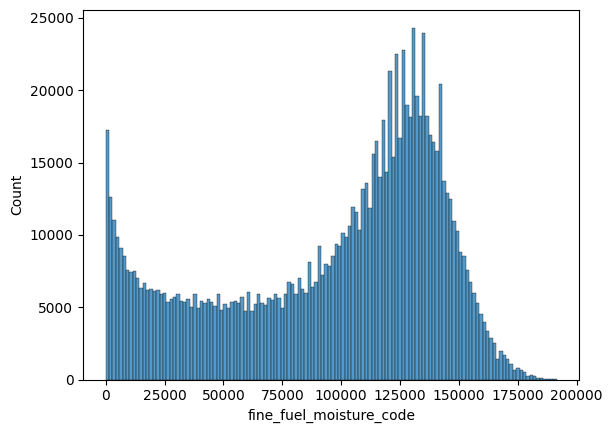

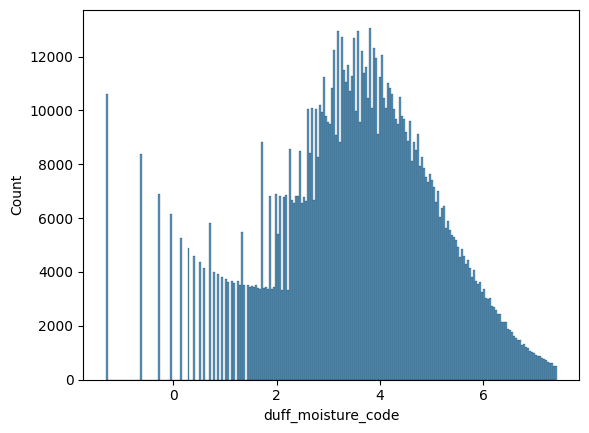

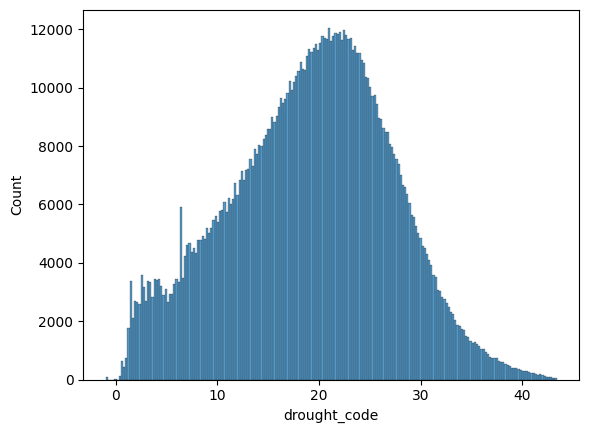

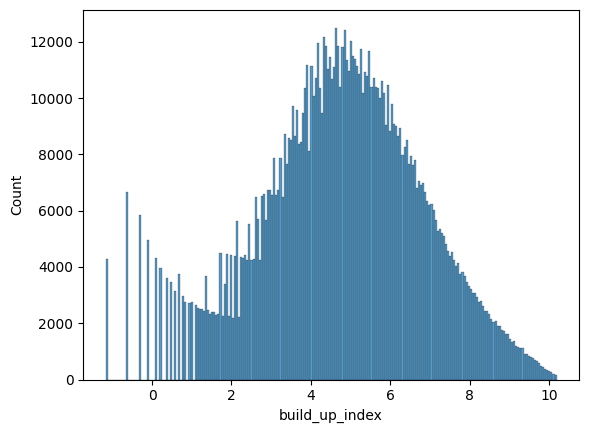

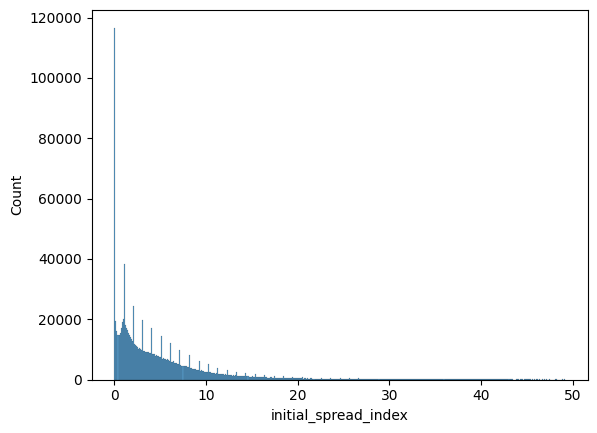

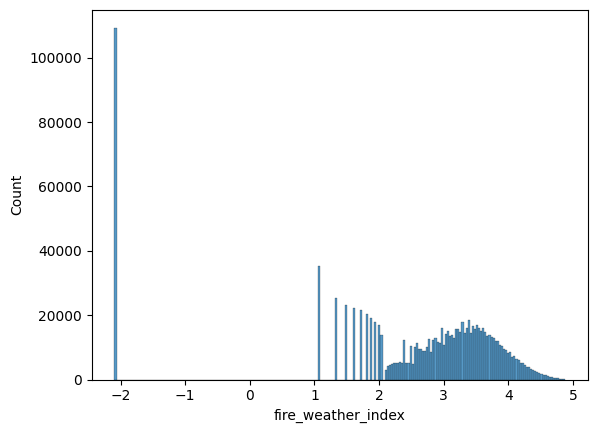

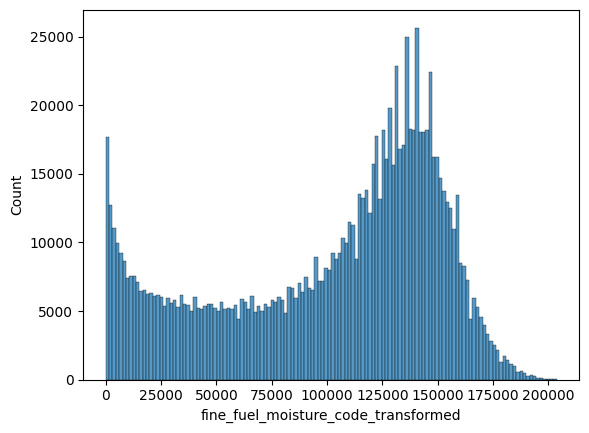

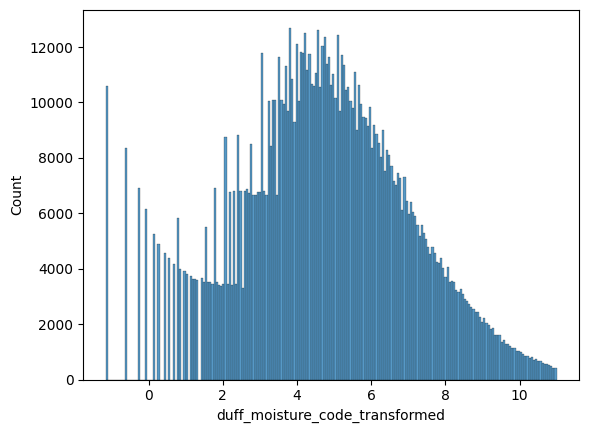

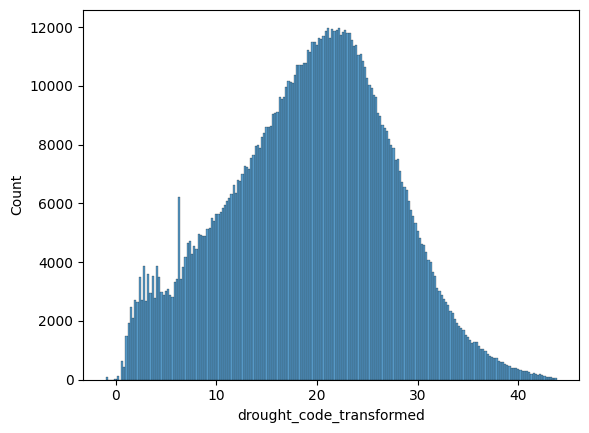

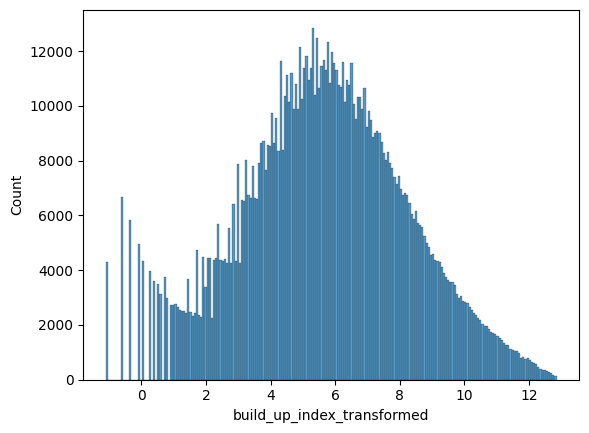

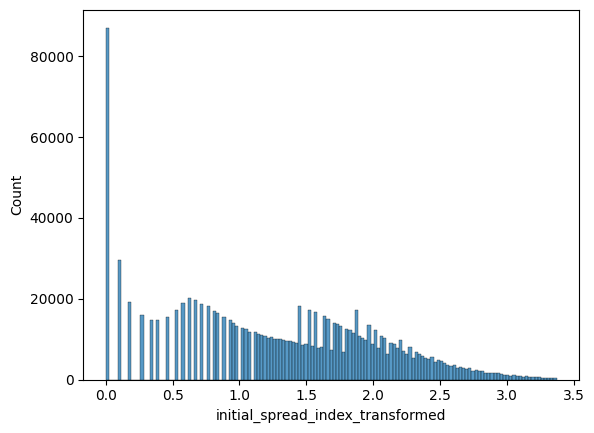

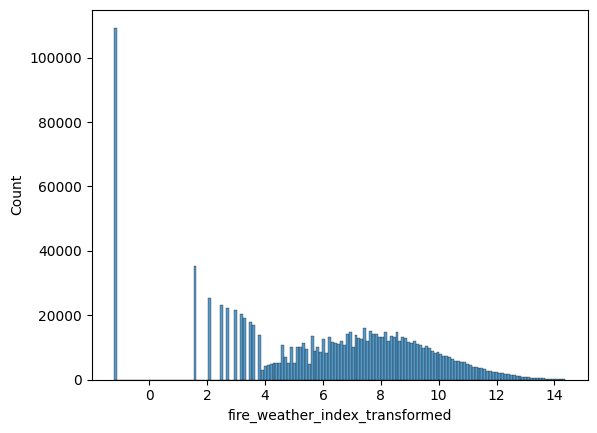

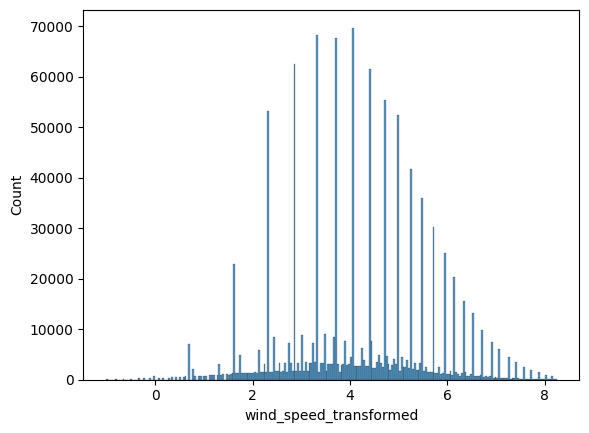

In [18]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [19]:
# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and std for each numeric column
mean_std_dict = {}

for col in num_cols:
    mean_std_dict[col] = {
        'mean': data[col].mean(),
        'std': data[col].std()
    }

mean_std_dict

{'temperature': {'mean': np.float64(16.997678811669523),
  'std': np.float64(7.325322790604319)},
 'dew_point_temperature': {'mean': np.float64(7.712805421942095),
  'std': np.float64(6.932092717763646)},
 'relative_humidity': {'mean': np.float64(58.24833969149113),
  'std': np.float64(20.387853518562597)},
 'wind_speed': {'mean': np.float64(4.090273716201471),
  'std': np.float64(1.415577764218852)},
 'atmospheric_pressure': {'mean': np.float64(1014.7458697591271),
  'std': np.float64(6.681875455779004)},
 'precipitation': {'mean': np.float64(2.3807253091539047),
  'std': np.float64(6.4571600440728805)},
 'rain_days': {'mean': np.float64(2.343939477709589),
  'std': np.float64(3.9168148461578824)},
 'fine_fuel_moisture_code': {'mean': np.float64(95145.38392584644),
  'std': np.float64(47090.36789865172)},
 'duff_moisture_code': {'mean': np.float64(3.5424843386510236),
  'std': np.float64(1.5979648293664108)},
 'drought_code': {'mean': np.float64(19.182018945506446),
  'std': np.float6

In [20]:
scaler = StandardScaler()

for col in data.columns:
    if data[col].dtype != 'object':
        # Reshape the column to 2D array for scaler
        col_values = data[col].values.reshape(-1, 1)
        
        # Fit and transform
        scaled = scaler.fit_transform(col_values)
        
        # Flatten back to 1D and assign
        data[col] = scaled.flatten()

In [21]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-1.542278,-1.978163,-0.796962,-1.402629,-0.840463,-0.368696,-0.343121,-0.803514,-0.614746,0.584132,...,-0.719105,-0.402948,United Kingdom,-0.805687,-0.670963,0.583845,-0.541734,-0.997918,-0.824827,-1.401004
1,-0.245406,0.344369,0.625454,-1.264147,0.576804,-0.368696,0.678118,0.537986,0.653703,-0.067795,...,-0.366674,0.404259,Canada,0.537518,0.642961,-0.068498,0.557491,-0.044330,0.325514,-1.263390
2,-1.514975,-0.506746,1.459284,1.380426,-0.746179,0.730860,-0.598430,-1.706325,-0.015055,0.920652,...,-0.803017,-0.627057,Canada,-1.704931,-0.069545,0.920752,0.080045,-1.429882,-1.070028,1.382750
3,0.491763,1.108929,0.625454,0.690947,0.099393,-0.368696,-0.343121,-0.665732,-0.659132,0.289623,...,-0.568063,-0.168002,Canada,-0.668007,-0.713890,0.289089,-0.596800,-0.486723,-0.532715,0.690174
4,-0.818760,-0.247084,0.649978,-0.053739,-1.323861,-0.329979,-0.598430,-0.307861,-0.880917,-1.681869,...,-0.601628,-0.355769,United States,-0.310054,-0.924793,-1.680780,-1.176885,-0.581727,-0.769029,-0.055960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085215,-0.750504,-0.463469,0.184015,-0.104991,0.142794,-0.337722,-0.598430,-0.028334,-1.405816,-0.274115,...,-0.534498,-0.315177,Canada,-0.030169,-1.397569,-0.274843,-1.296851,-0.399293,-0.719867,-0.107230
1085216,0.123178,-0.261509,-0.625291,-0.900526,-0.395977,-0.368696,-0.087811,0.529362,-0.694075,-1.128560,...,-0.316327,0.091654,Canada,0.528867,-0.747520,-1.128693,-0.784089,0.042679,-0.168828,-0.901477
1085217,0.191435,0.185686,-0.183852,0.164730,0.352316,-0.368696,-0.343121,0.625281,0.268154,-0.333352,...,0.019322,0.502829,Canada,0.625089,0.227201,-0.334077,0.174121,0.489266,0.493980,0.162710
1085218,-0.818760,-1.256880,-0.718484,1.507549,0.052999,-0.368696,0.422808,0.678577,-0.413914,0.342248,...,1.143744,0.630039,Canada,0.678563,-0.473890,0.341752,-0.347429,1.286050,0.720238,1.510608


In [22]:
df_sample = data.sample(n= 5000,random_state= 42 )
df_sample

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
454094,-0.354616,0.488625,1.101228,-0.576135,1.265234,-0.365598,-0.087811,0.068515,-0.272571,0.662576,...,-0.551281,0.033915,United States,0.066857,-0.332508,0.662370,-0.191916,-0.442134,-0.253438,-0.577986
499028,1.106071,1.123355,-0.208376,-0.900526,0.950951,-0.368696,0.678118,0.732569,0.339410,0.311033,...,-0.131720,0.488640,Canada,0.732739,0.303045,0.310514,0.373108,0.311505,0.469360,-0.901477
625307,0.737486,-0.088401,-1.042206,-0.498257,-0.006865,-0.368696,1.444047,0.955567,0.887622,0.721658,...,0.287841,0.730890,Canada,0.956563,0.901404,0.721516,0.953509,0.744691,0.906661,-0.500244
519210,0.560019,-0.593300,-1.287450,-0.863932,0.576804,-0.368696,-0.087811,0.917612,0.451551,0.194079,...,0.120016,0.590070,Canada,0.918461,0.423334,0.193485,0.458473,0.592706,0.648078,-0.865013
999152,-0.409222,0.041430,0.448878,-1.264147,-0.291216,-0.368696,0.678118,0.634115,-0.223153,-0.274768,...,-0.282762,0.270935,Canada,0.633953,-0.282575,-0.275496,-0.226562,0.096953,0.107224,-1.263390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788919,0.546368,0.762713,0.105536,0.912230,0.816258,-0.368696,-0.343121,0.537986,-0.150565,0.054791,...,0.271058,0.509736,Canada,0.537518,-0.208766,0.054129,-0.117681,0.730479,0.506010,0.912280
697079,0.218737,0.459774,0.085917,1.076361,0.350819,0.374666,-0.598430,-0.845588,-0.522786,0.599014,...,-0.534498,-0.035791,Canada,-0.847714,-0.581294,0.598742,-0.450793,-0.399293,-0.352775,1.077129
139617,0.136830,-0.679854,-1.042206,-0.307458,1.160473,-0.368696,-0.087811,0.796442,-0.163341,0.253710,...,0.103234,0.466344,United States,0.796839,-0.221796,0.253152,-0.113696,0.576177,0.430924,-0.309655
604175,0.942255,0.171261,-0.968633,1.507549,0.322384,-0.368696,0.167499,1.081122,0.434268,0.128352,...,2.872334,0.956601,United States,1.082625,0.404722,0.127724,0.425496,1.888412,1.346314,1.510608


In [23]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed'],
      dtype='object')

In [24]:
New_data = data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [25]:
New_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-1.542278,-1.978163,-0.796962,-0.840463,-0.368696,-0.343121,United Kingdom,-0.805687,-0.670963,0.583845,-0.541734,-0.997918,-0.824827,-1.401004
1,-0.245406,0.344369,0.625454,0.576804,-0.368696,0.678118,Canada,0.537518,0.642961,-0.068498,0.557491,-0.044330,0.325514,-1.263390
2,-1.514975,-0.506746,1.459284,-0.746179,0.730860,-0.598430,Canada,-1.704931,-0.069545,0.920752,0.080045,-1.429882,-1.070028,1.382750
3,0.491763,1.108929,0.625454,0.099393,-0.368696,-0.343121,Canada,-0.668007,-0.713890,0.289089,-0.596800,-0.486723,-0.532715,0.690174
4,-0.818760,-0.247084,0.649978,-1.323861,-0.329979,-0.598430,United States,-0.310054,-0.924793,-1.680780,-1.176885,-0.581727,-0.769029,-0.055960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085215,-0.750504,-0.463469,0.184015,0.142794,-0.337722,-0.598430,Canada,-0.030169,-1.397569,-0.274843,-1.296851,-0.399293,-0.719867,-0.107230
1085216,0.123178,-0.261509,-0.625291,-0.395977,-0.368696,-0.087811,Canada,0.528867,-0.747520,-1.128693,-0.784089,0.042679,-0.168828,-0.901477
1085217,0.191435,0.185686,-0.183852,0.352316,-0.368696,-0.343121,Canada,0.625089,0.227201,-0.334077,0.174121,0.489266,0.493980,0.162710
1085218,-0.818760,-1.256880,-0.718484,0.052999,-0.368696,0.422808,Canada,0.678563,-0.473890,0.341752,-0.347429,1.286050,0.720238,1.510608


In [26]:
New_data.to_csv(r'C:\Infosys_Spring_Project\standardized_data.csv.csv', index=False)